# Zomato Case Study in Bangalore

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Importing dataset as CSV file

In [138]:
data = pd.read_csv("C:/Users/Hanny/Downloads/zomato.csv/zomato.csv")

In [139]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Show Column

In [140]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## Drop column which we don't need

In [141]:
data.drop(['url','address','phone','menu_item','listed_in(type)','listed_in(city)'],axis=1,inplace=True)

In [142]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [143]:
data.shape

(51717, 11)

In [144]:
data.drop(['reviews_list'],axis=1,inplace=True)

In [145]:
data.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800


In [146]:
data.shape

(51717, 10)

# Data Cleaning

## Checking Null value available

In [147]:
data.isna().sum()     # Column wise null values 

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
dtype: int64

### find columns with Null Value

In [148]:
col_null = [i for i in data.columns if data[i].isna().sum() > 0] 
col_null

['rate',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

### find percentage of null value in each columns

In [44]:
for i in col_null:
    print(f"{i}  --> {np.round((data[i].isna().sum() / len(data[i]))*100,4)}%  Null Value")

rate  --> 15.0337%  Null Value
location  --> 0.0406%  Null Value
rest_type  --> 0.4389%  Null Value
dish_liked  --> 54.2916%  Null Value
cuisines  --> 0.087%  Null Value
approx_cost(for two people)  --> 0.669%  Null Value


### Unique values present in the column

In [149]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### Dropping the rows with null value in rating

In [150]:
data.dropna(axis=0,subset=['rate'],inplace=True)

### Since rating is in 4.1/5 , removing this slash 

In [151]:
def split(x):
    return x.split('/')[0].strip()

In [152]:
data['rate']=data['rate'].apply(split)

In [153]:
data.rate

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 43942, dtype: object

In [154]:
data.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '-',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

### we can see here few extra value is also there other than 'nan' that is --> NEW , -

In [155]:
data.rate.replace(['NEW','-'],0,inplace=True)

In [156]:
data.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43942 non-null  object
 1   online_order                 43942 non-null  object
 2   book_table                   43942 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        43942 non-null  int64 
 5   location                     43942 non-null  object
 6   rest_type                    43791 non-null  object
 7   dish_liked                   23609 non-null  object
 8   cuisines                     43931 non-null  object
 9   approx_cost(for two people)  43690 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


### Change Data Type for rate :-

In [158]:
data.rate = data.rate.astype(float)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         43942 non-null  object 
 1   online_order                 43942 non-null  object 
 2   book_table                   43942 non-null  object 
 3   rate                         43942 non-null  float64
 4   votes                        43942 non-null  int64  
 5   location                     43942 non-null  object 
 6   rest_type                    43791 non-null  object 
 7   dish_liked                   23609 non-null  object 
 8   cuisines                     43931 non-null  object 
 9   approx_cost(for two people)  43690 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.7+ MB


## Calculate Average Rating for each table

In [160]:
ratings = pd.pivot_table(data,index='name',values='rate')
ratings[0:10]

,rate
name,
#FeelTheROLL,3.400
#L-81 Cafe,3.900
#refuel,3.700
1000 B.C,3.200
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700
11 to 11 Express Biriyanis,3.500
1131 Bar + Kitchen,4.500
12th Main - Grand Mercure,4.100
1441 Pizzeria,4.100


### Soting the pivot table in descending order

In [161]:
sorted_ratings = ratings.sort_values(['rate'],ascending=False)
sorted_ratings[0:10]

,rate
name,
Asia Kitchen By Mainland China,4.900000
Byg Brewski Brewing Company,4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.844828
O.G. Variar & Sons,4.800000
Flechazo,4.800000
The Pizza Bakery,4.800000
AB's - Absolute Barbecues,4.789474


### To print name only of Top 10 rated Resturant

In [101]:
sorted_ratings.index.tolist()[0:10]

['Asia Kitchen By Mainland China',
 'Byg Brewski Brewing Company',
 'SantÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Spa Cuisine',
 'Punjab Grill',
 'Belgian Waffle Factory',
 'O.G. Variar & Sons',
 'Flechazo',
 'The Pizza Bakery',
 "AB's - Absolute Barbecues",
 'Barbecue by Punjab Grill']

### Plot the Bar Plot

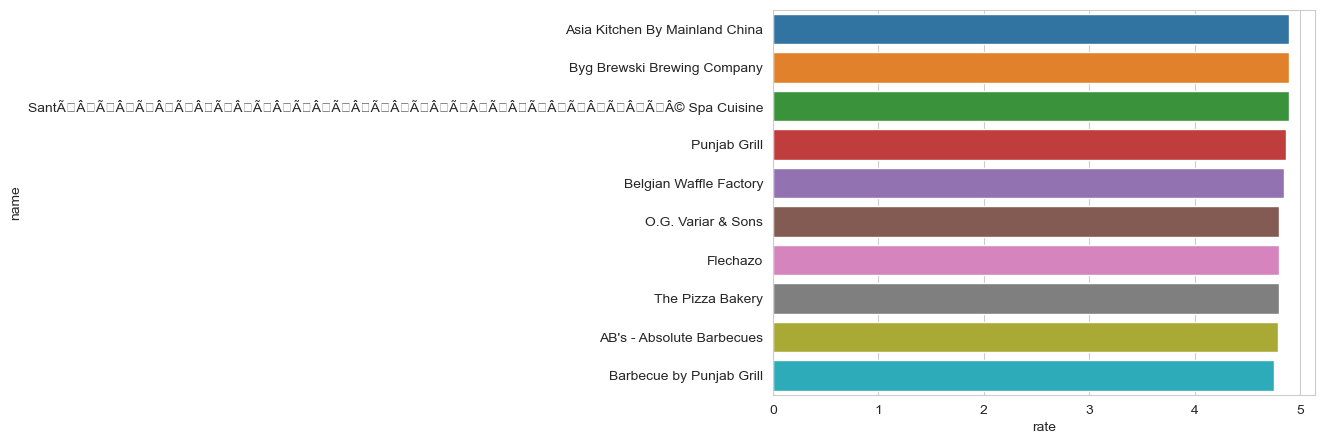

In [127]:
plt.figure(figsize=(7,5))
sns.barplot(sorted_ratings[0:10].rate,sorted_ratings[0:10].index,orient="h")
plt.show()

### Distribution of rating -- Distribution Plot

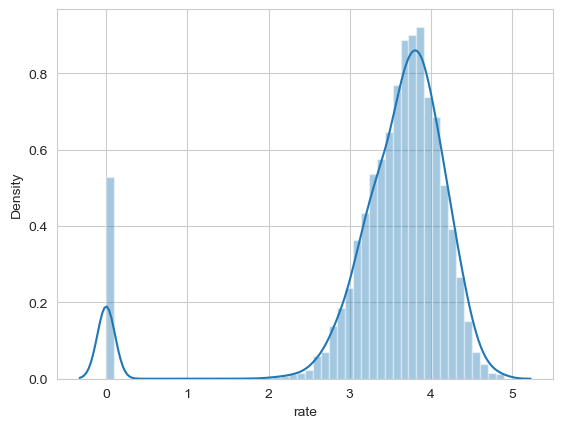

In [115]:
sns.set_style('whitegrid')
sns.distplot(data['rate'])

plt.show()

#### This is Normal Distribution plot as there is spike of '0'

### Top Restrurant chains

In [116]:
data.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550


In [117]:
data.name.value_counts()

Cafe Coffee Day               89
Onesta                        85
Empire Restaurant             71
Just Bake                     68
Five Star Chicken             68
                              ..
SV Food Garden                 1
Ginger restaurant              1
Darjeeling Hot Momos           1
Sri Annapoorna Andhra Mess     1
SeeYa Restaurant               1
Name: name, Length: 7162, dtype: int64

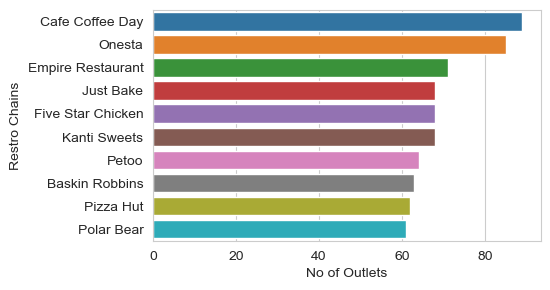

In [131]:
plt.figure(figsize=(5,3))
sns.barplot(data.name.value_counts()[0:10],data.name.value_counts()[0:10].index,orient='h')
plt.xlabel("No of Outlets")
plt.ylabel("Restro Chains")

plt.show()

### How many restaurants don't accept online orders

In [163]:
data.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600


In [164]:
x = data.online_order.value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

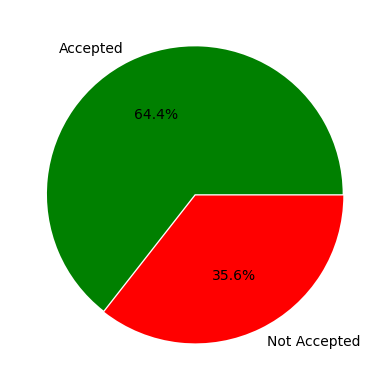

In [165]:
labels = ['Accepted','Not Accepted']

plt.pie(x,labels=labels,colors=['green','red'],explode=[0.0,0.01],autopct='%1.1f%%')

plt.show()

#### Inference from this : 64.4% Restaurants accepts Online orders

## How many restaurants had Table Booking

In [166]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800


In [167]:
table_book = data.book_table.value_counts()
table_book

No     37509
Yes     6433
Name: book_table, dtype: int64

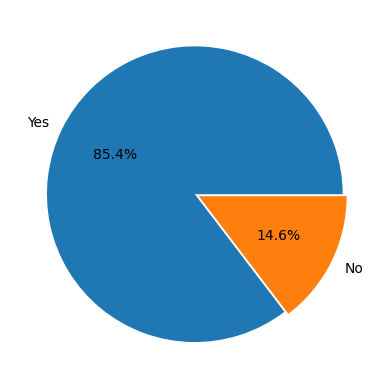

In [168]:
labels=['Yes','No']
plt.pie(table_book,labels=labels,explode=[0.0,0.03],autopct='%1.1f%%')

plt.show()

#### Inference from this : 85.4% retaurants accepts online Table Booking

## Analysis on Type of Restaurants

In [169]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800


In [170]:
type_rest = data.rest_type.value_counts()[0:10]
type_rest

Quick Bites           15073
Casual Dining          9923
Cafe                   3527
Dessert Parlor         1939
Delivery               1791
Takeaway, Delivery     1472
Casual Dining, Bar     1141
Bakery                  775
Beverage Shop           704
Bar                     661
Name: rest_type, dtype: int64

In [146]:
data.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [147]:
len(data.rest_type.unique())

88

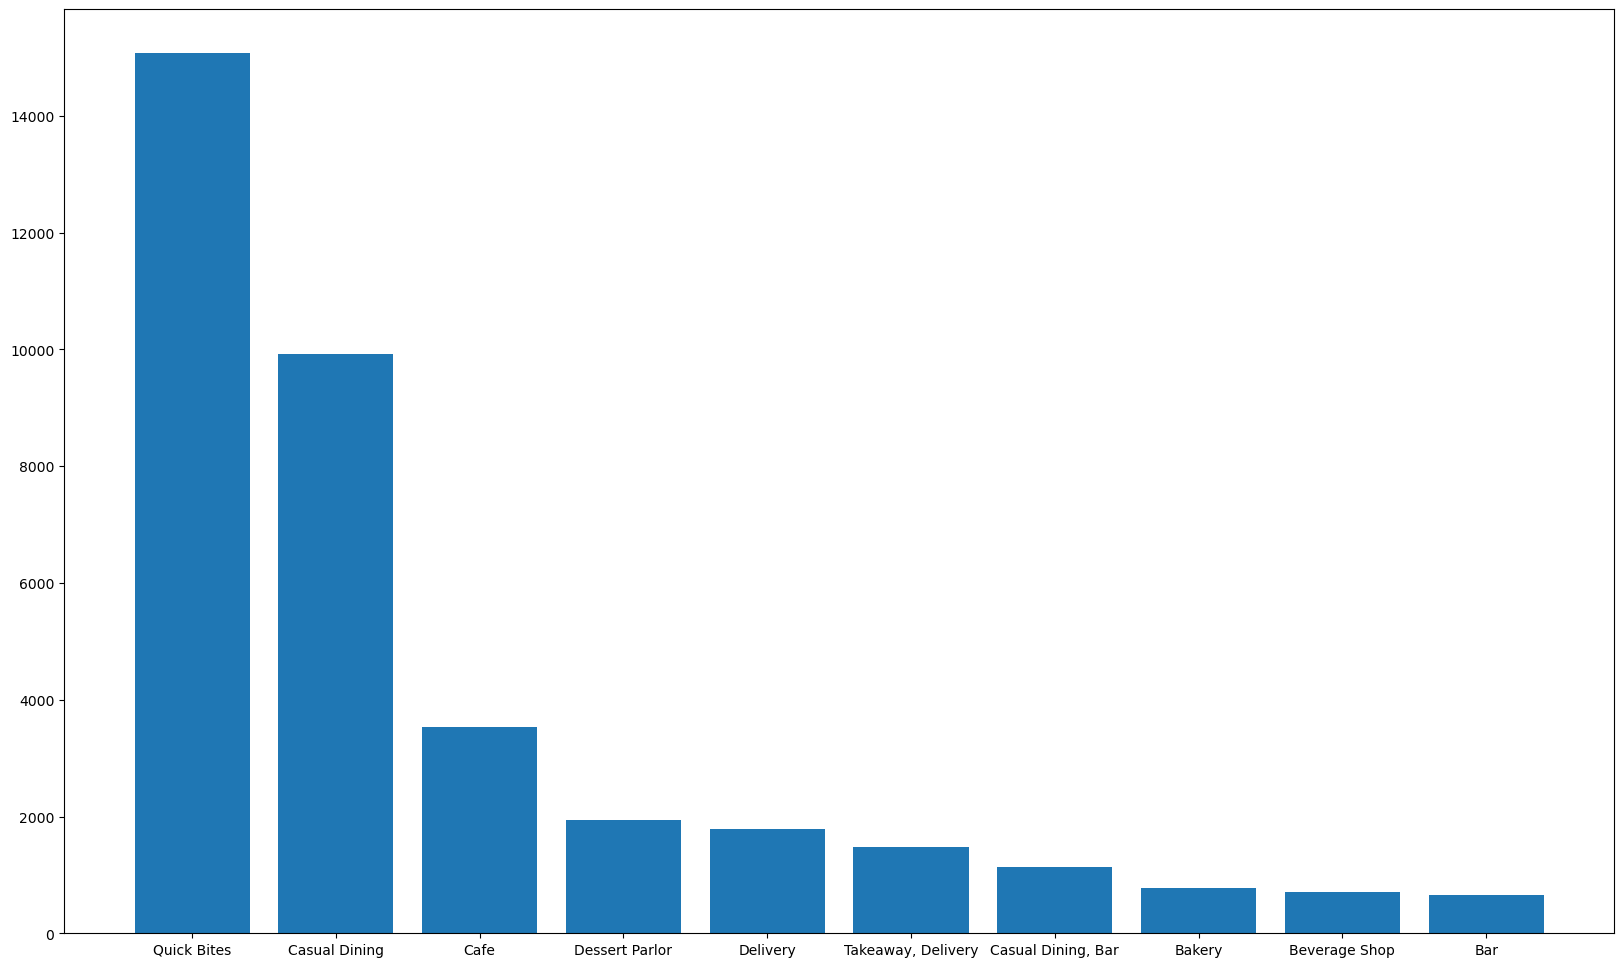

In [171]:
plt.figure(figsize=(20,12))
plt.bar(type_rest.index,type_rest)

plt.show()

#### Inference from this : People of Bangalore prefer mostly Quick Bites and Casual Dinning type mostly

### Resturant with Highest number of voting given 

In [13]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800


In [172]:
voting = data.groupby('name')[['votes']].mean()
voting

,votes
name,
#FeelTheROLL,7.000000
#L-81 Cafe,48.000000
#refuel,37.000000
1000 B.C,49.000000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,41.000000
...,...
i-Bar - The Park Bangalore,619.727273
iFruit Live Ice Creams,10.000000
iSpice Resto Cafe,30.142857


In [173]:
voting['votes'].describe()

count     7162.000000
mean       201.484245
std        607.015608
min          0.000000
25%         10.400000
50%         38.750000
75%        146.797414
max      16588.500000
Name: votes, dtype: float64

In [174]:
high_vot = voting[voting['votes'] >5000]
high_vot

,votes
name,
Arbor Brewing Company,8396.545455
Big Pitcher,9164.500000
Brew and Barbeque - A Microbrewery Pub,5868.200000
Byg Brewski Brewing Company,16588.500000
Church Street Social,7561.727273
Fenny's Lounge And Kitchen,6370.214286
Hard Rock Cafe,5276.583333
Hoot,7257.000000
Prost Brew Pub,7860.900000


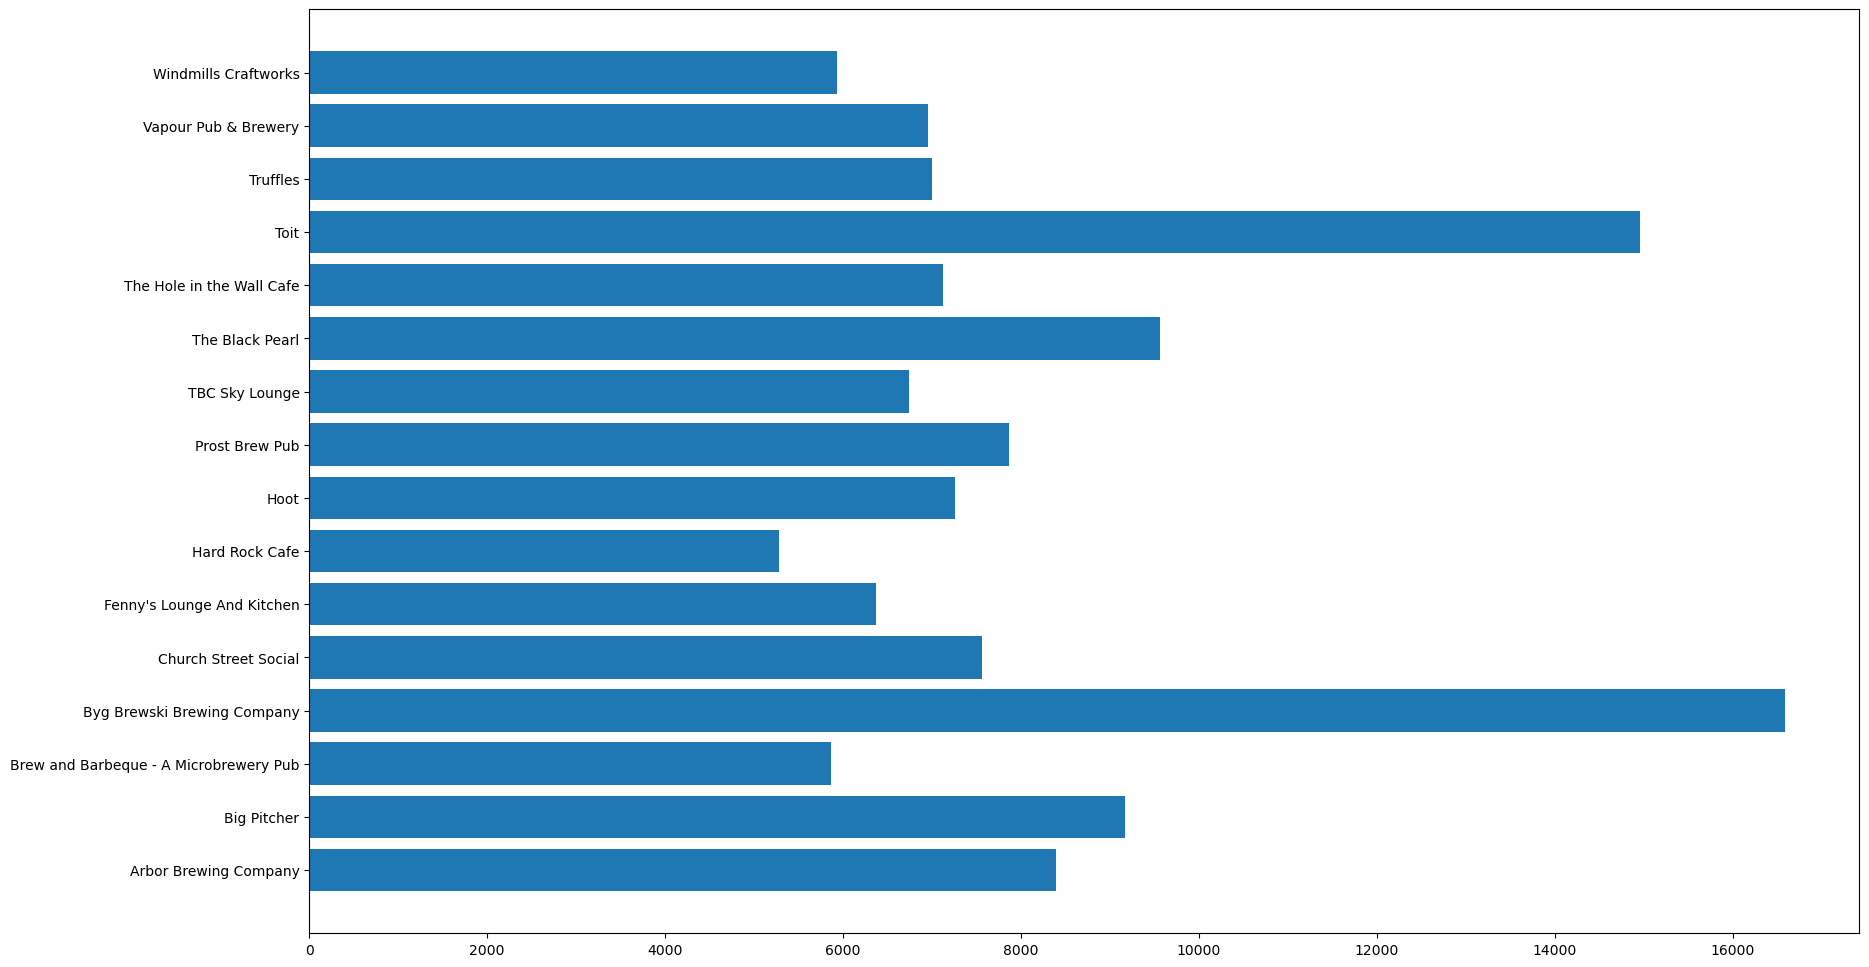

In [175]:
plt.figure(figsize=(20,12),dpi=100)

plt.barh(high_vot.index,high_vot['votes'])

plt.show()

### Let's analyse the highly rated restro and Worst restro based on number of rating given

#### Top Restro

In [48]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600


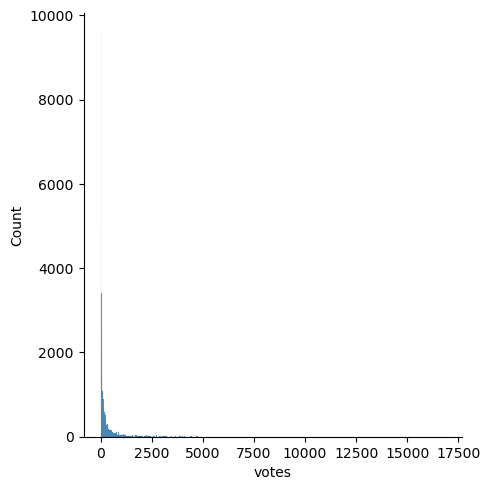

In [176]:
sns.displot(data['votes'])
plt.show()

In [179]:
voting_rating = data.groupby('name')[['votes']].mean().sort_values('votes',ascending=False)
voting_rating[:10]

,votes
name,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
Prost Brew Pub,7860.900000
Church Street Social,7561.727273
Hoot,7257.000000
The Hole in the Wall Cafe,7124.875000


In [180]:
voting_rating['name'] = voting_rating.index
voting_rating

,votes,name
name,,
Byg Brewski Brewing Company,16588.500000,Byg Brewski Brewing Company
Toit,14956.000000,Toit
The Black Pearl,9562.333333,The Black Pearl
Big Pitcher,9164.500000,Big Pitcher
Arbor Brewing Company,8396.545455,Arbor Brewing Company
...,...,...
NutriFit,0.000000,NutriFit
Cross Roads Inn,0.000000,Cross Roads Inn
Crown Resto,0.000000,Crown Resto


In [181]:
voting_rating = voting_rating.reset_index(drop=True)

In [182]:
voting_rating.head()

,votes,name
0,16588.500000,Byg Brewski Brewing Company
1,14956.000000,Toit
2,9562.333333,The Black Pearl
3,9164.500000,Big Pitcher
4,8396.545455,Arbor Brewing Company


In [183]:
voting_rating = pd.merge(voting_rating,data[['rate','name']])
voting_rating[0:15]

,votes,name,rate
0,16588.500000,Byg Brewski Brewing Company,4.9
1,16588.500000,Byg Brewski Brewing Company,4.9
2,16588.500000,Byg Brewski Brewing Company,4.9
3,16588.500000,Byg Brewski Brewing Company,4.9
4,16588.500000,Byg Brewski Brewing Company,4.9
5,16588.500000,Byg Brewski Brewing Company,4.9
6,14956.000000,Toit,4.7
7,14956.000000,Toit,4.7
8,9562.333333,The Black Pearl,4.8
9,9562.333333,The Black Pearl,4.8


In [184]:
vote_top = voting_rating[voting_rating['votes']>5000]
vote_top.head(5)

,votes,name,rate
0,16588.5,Byg Brewski Brewing Company,4.9
1,16588.5,Byg Brewski Brewing Company,4.9
2,16588.5,Byg Brewski Brewing Company,4.9
3,16588.5,Byg Brewski Brewing Company,4.9
4,16588.5,Byg Brewski Brewing Company,4.9


In [185]:
vote_top.columns

Index(['votes', 'name', 'rate'], dtype='object')

In [187]:
vote_top1 = vote_top.groupby('name')[['rate']].mean().sort_values('rate',ascending=False)
vote_top1

,rate
name,
Byg Brewski Brewing Company,4.900000
The Black Pearl,4.727778
TBC Sky Lounge,4.700000
Toit,4.700000
Big Pitcher,4.650000
Brew and Barbeque - A Microbrewery Pub,4.620000
The Hole in the Wall Cafe,4.600000
Windmills Craftworks,4.600000
Truffles,4.595349


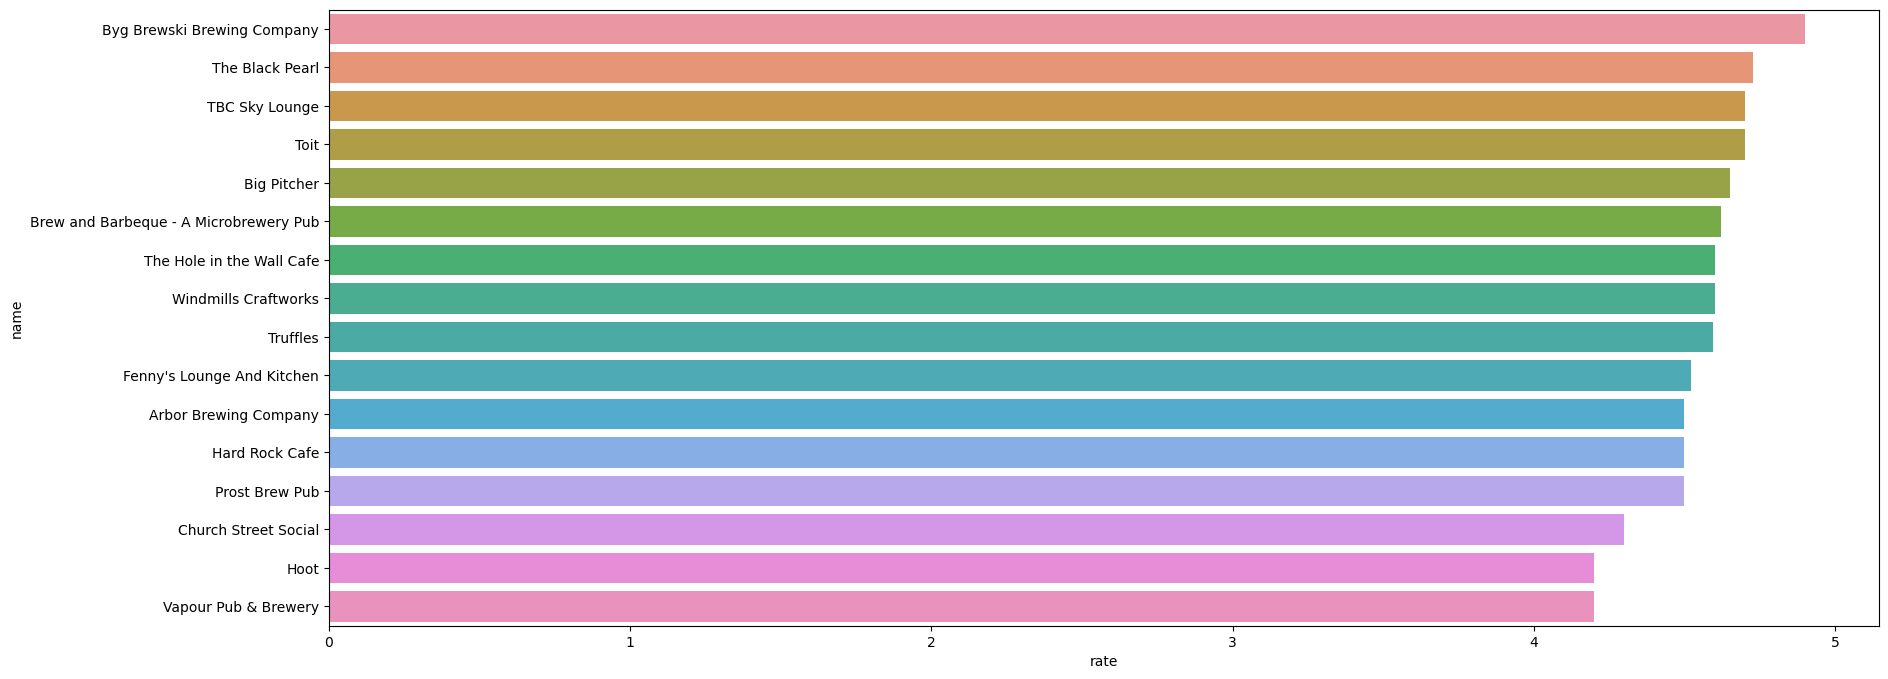

In [188]:
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(vote_top1['rate'],vote_top1.index,orient='h')

plt.show()

In [191]:
bad_count = voting_rating[(voting_rating['rate']<3) & (voting_rating['rate']>0)]
bad_count

,votes,name,rate
3725,967.681818,Kritunga Restaurant,2.6
3726,967.681818,Kritunga Restaurant,2.9
3727,967.681818,Kritunga Restaurant,2.9
3742,967.681818,Kritunga Restaurant,2.7
3743,967.681818,Kritunga Restaurant,2.7
...,...,...,...
42110,4.000000,Special Biriyani,2.9
42111,4.000000,Special Biriyani,2.9
42198,4.000000,Sandesh Restaurant,2.9
42311,2.500000,Kushi Meals,2.8


In [192]:
bad_resturants =  bad_count[bad_count['votes']>500].groupby('name')[['rate']].mean()
bad_resturants

,rate
name,
Anjappar,2.833333
FreshMenu,2.800000
Kabab Magic,2.900000
Kritunga Restaurant,2.760000
Lakeview Milkbar,2.900000
Lazeez,2.600000
Moriz Restaurant,2.775000
Savoury Restaurant,2.900000
Smoke - The Sizzler House,2.800000


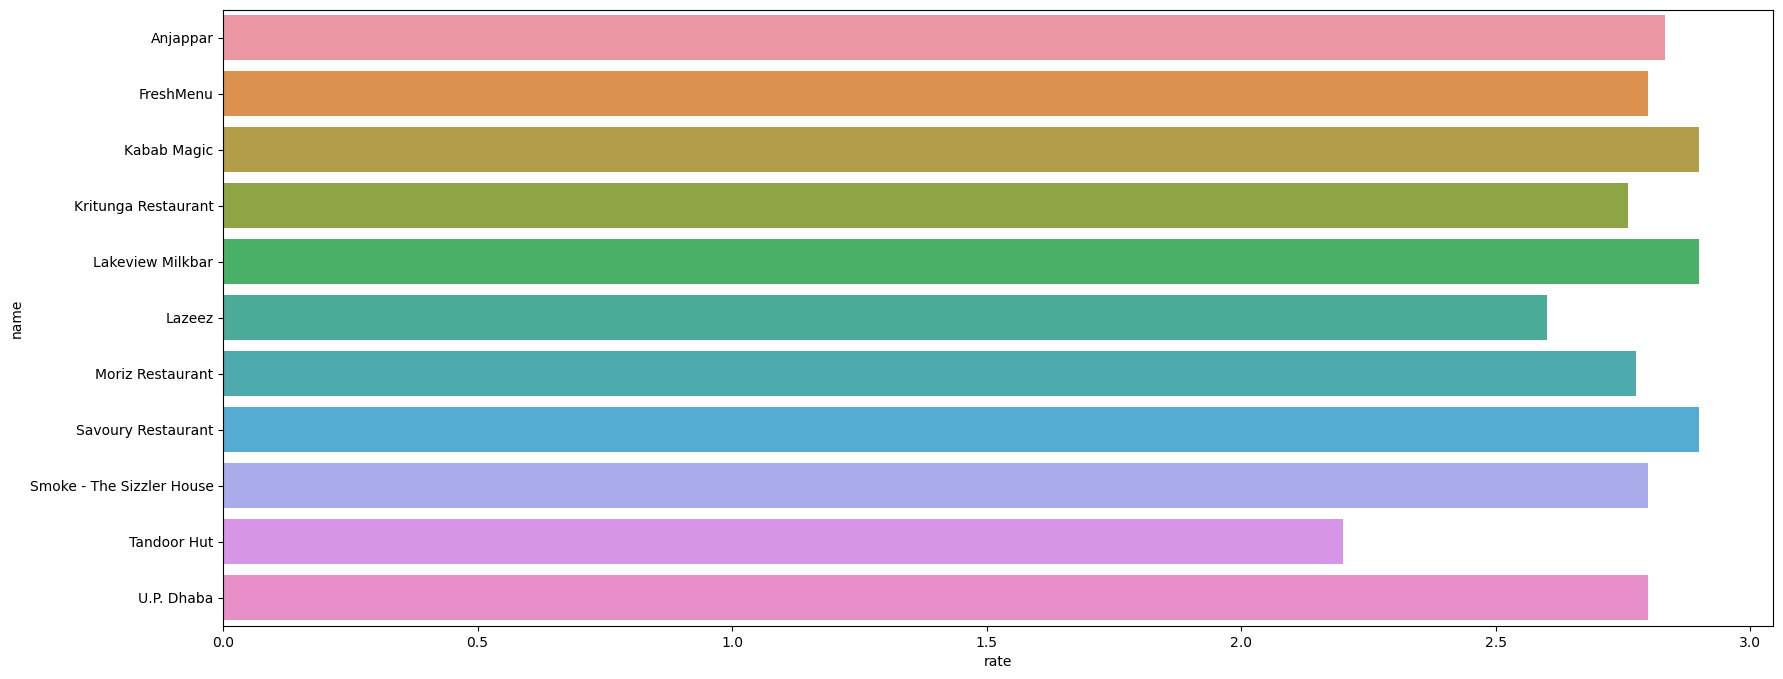

In [195]:
plt.figure(figsize=(20,8))
sns.barplot(bad_resturants['rate'],bad_resturants.index)

plt.show()

#### These restro is having high number of voting given but having less rate.

## Location in which we have highest number of resturants

In [199]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800


In [202]:
location_restro = data[['location']].value_counts()[0:20]
location_restro

location             
BTM                      4261
Koramangala 5th Block    2381
HSR                      2128
Indiranagar              1936
JP Nagar                 1849
Jayanagar                1718
Whitefield               1693
Marathahalli             1503
Bannerghatta Road        1324
Koramangala 6th Block    1111
Koramangala 7th Block    1089
Brigade Road             1084
Bellandur                1078
Koramangala 1st Block     965
Electronic City           964
Sarjapur Road             919
Ulsoor                    901
Koramangala 4th Block     864
MG Road                   836
Banashankari              805
dtype: int64

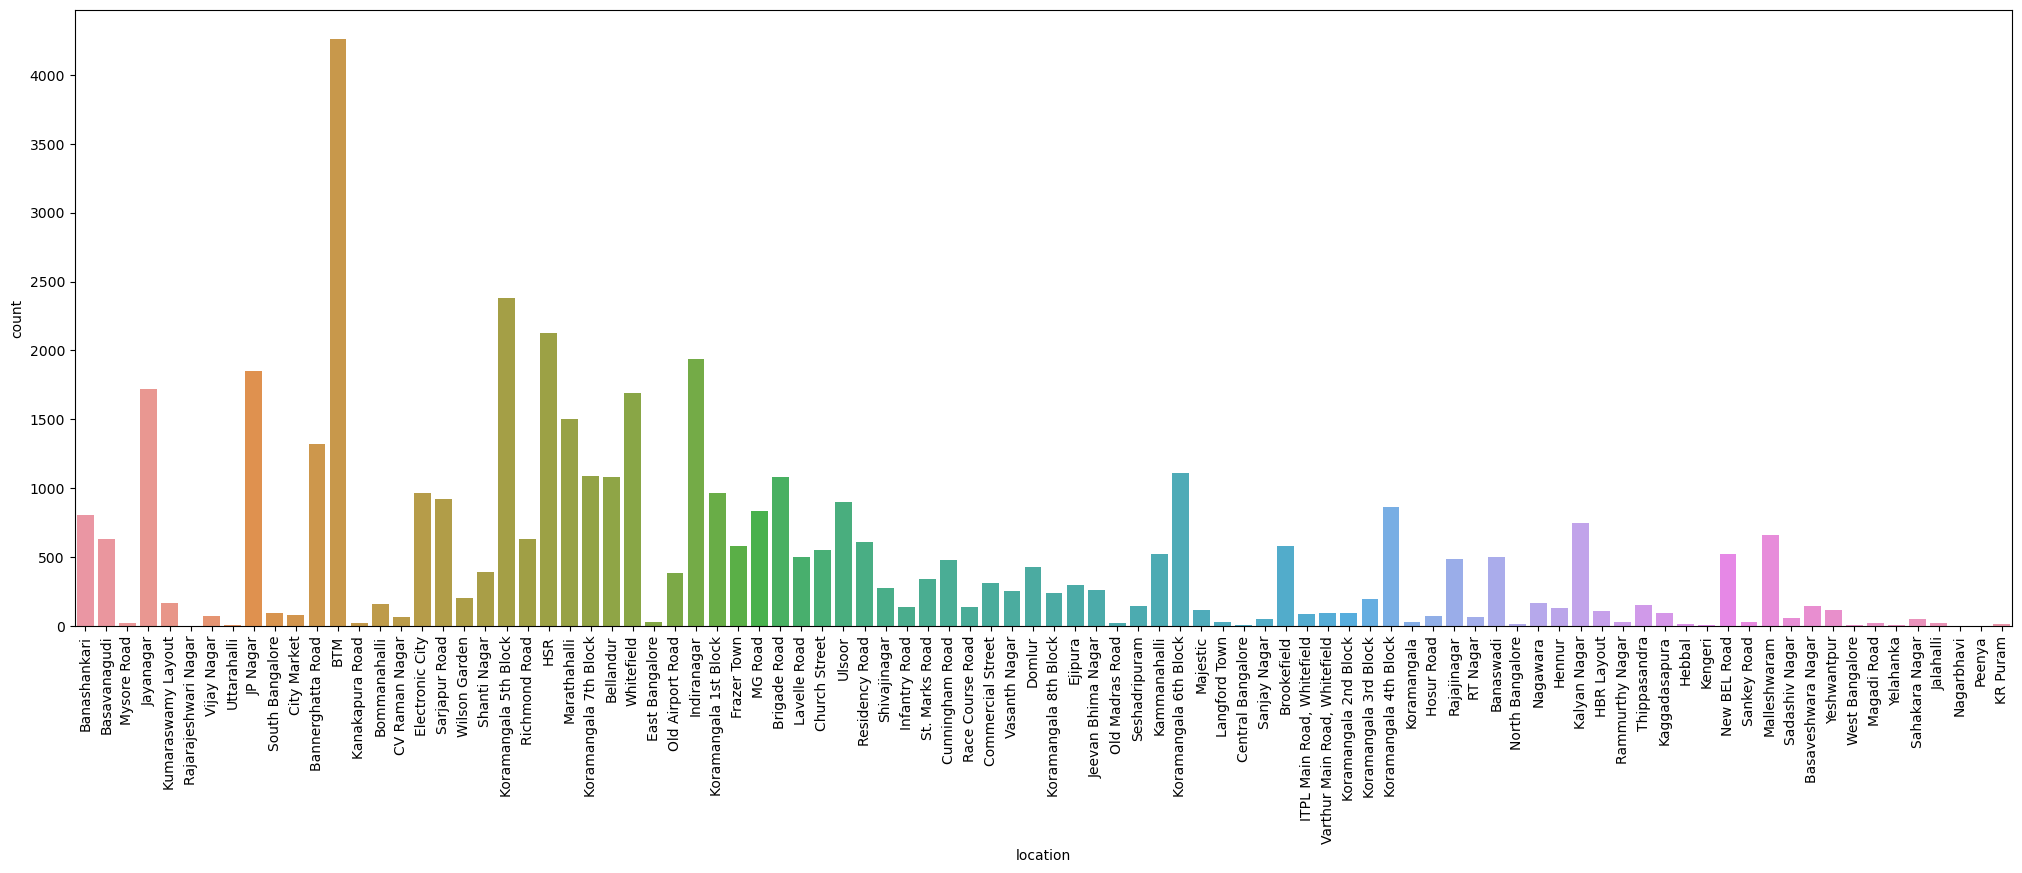

In [211]:
plt.figure(figsize=(25,8))
sns.countplot(data['location'])

plt.xticks(rotation=90)

plt.show()

## Top 10 cuisines

In [214]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600


In [215]:
data.rest_type.value_counts()

Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

In [216]:
cusin = data.cuisines.value_counts()[0:10]
print(cusin)

North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64


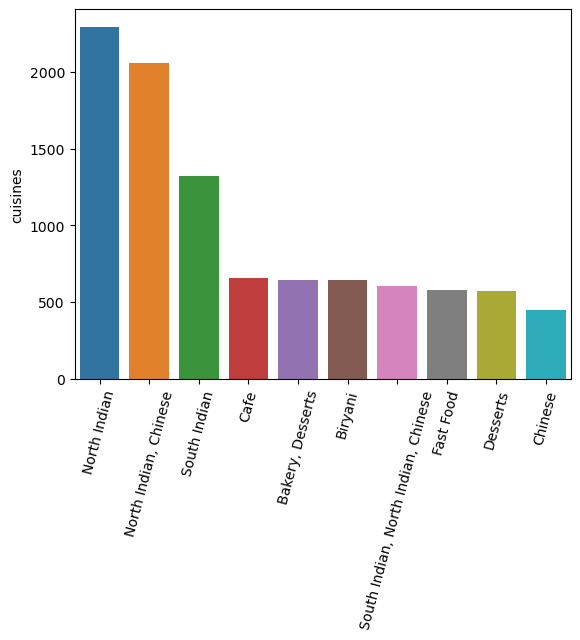

In [217]:
sns.barplot(cusin.index,cusin)
plt.xticks(rotation=75)
plt.show()

## check the distribution for cost of 2 people

#### Null value in a column

In [219]:
data['approx_cost(for two people)'].isna().sum()

252

In [221]:
data.dropna(axis=0,subset=['approx_cost(for two people)'],inplace=True)

In [222]:
data['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 43690, dtype: object

#### Now since the dtype is object , we need to change it to int 

#### one more issue is the that in the numbers ther is comma , so we need  function to replace it

In [226]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x : x.replace(',',''))

In [228]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(int)

In [229]:
data['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 43690, dtype: int32

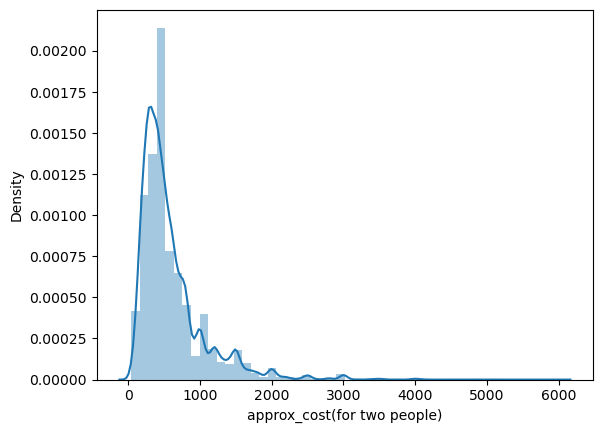

In [230]:
sns.distplot(data['approx_cost(for two people)'])

plt.show()

In [231]:
data['approx_cost(for two people)'].describe()

count    43690.000000
mean       594.270222
std        458.761551
min         40.000000
25%        300.000000
50%        450.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64